In [1]:
#Import Dependencies
from sqlalchemy import Column, Integer, String, Float

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()


from sqlalchemy.orm import Session

 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

In [2]:
import numpy as np
import pandas as pd 

In [3]:
import datetime as dt

In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
data = pd.read_sql("SELECT * FROM measurement", conn)
data.head(20)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [38]:
data1 = pd.read_sql("SELECT * FROM station", conn)
data1.head(20)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables 
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
Base.metadata.create_all(engine)
session = Session(bind=engine)

### Exploratory Climate Analysis

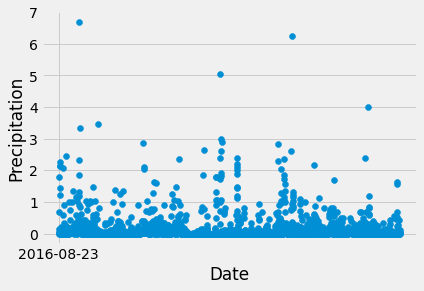

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
x_values=[]
y_values=[]
players = session.query(measurement).filter(measurement.date >= '2016-08-23').all()
for player in players:
  y_values.append(player.prcp)
  x_values.append(player.date)

plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(np.arange(0,1))
plt.show()


In [12]:
# Calculate the date 1 year ago from the last data point in the database
punters = session.query(measurement).order_by(measurement.date)    
    #2017-08-23 is the last date
# Perform a query to retrieve the data and precipitation scores
players = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()


# Save the query results as a Pandas DataFrame and set the index to the date column

qr_df = pd.DataFrame(players[:], columns=['date', 'prcp'])
qr_df.set_index('date', inplace=True, )
qr_df.head(20)

# Sort the dataframe by date
#It was sorted by date before in the query


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


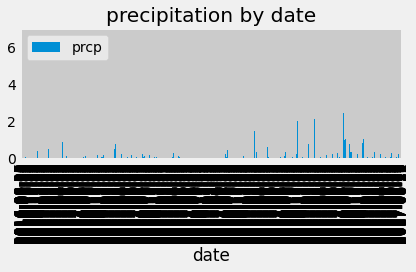

In [15]:
# Plot the dataframe
qr_df.plot.bar(title="precipitation by date")
plt.tight_layout()
plt.show()

In [32]:
#summary statistics
qr_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [37]:
# Design a query to show how many stations are available in this dataset?
station_num = pd.read_sql("SELECT count(station) FROM station", conn)

print(station_num)

   count(station)
0               9


In [42]:
# Design a query to show how many stations are available in this dataset?
station_num = pd.read_sql("SELECT distinct(station) FROM measurement", conn)

print(station_num)
#Also 9

       station
0  USC00519397
1  USC00513117
2  USC00514830
3  USC00517948
4  USC00518838
5  USC00519523
6  USC00519281
7  USC00511918
8  USC00516128


In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_num = pd.read_sql("SELECT count(station),station FROM measurement Group By station Order By count(station) desc", conn)

print(station_num)


   count(station)      station
0            2772  USC00519281
1            2724  USC00519397
2            2709  USC00513117
3            2669  USC00519523
4            2612  USC00516128
5            2202  USC00514830
6            1979  USC00511918
7            1372  USC00517948
8             511  USC00518838


In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#USC00519281 is the most active station

Avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
Min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
Max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The lowest temperature recorded is {Min}. The Highest Temperature Recorded is {Max} and the average is {Avg}.')

The lowest temperature recorded is [(54.0,)]. The Highest Temperature Recorded is [(85.0,)] and the average is [(71.66378066378067,)].


In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_num = pd.read_sql("SELECT count(tobs),station FROM measurement Where date >= '2016-08-23' Group By station Order By count(tobs) desc ", conn)
station_num



,count(tobs),station
0,361,USC00519397
1,352,USC00519281
2,349,USC00516128
3,343,USC00513117
4,337,USC00519523
5,305,USC00514830
6,183,USC00517948


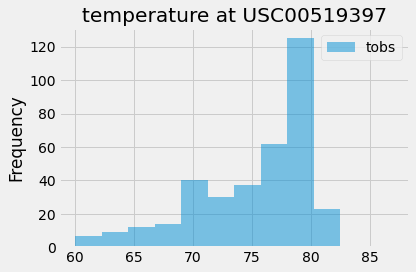

In [70]:

# USC00519397 is the most active station in the last 12 months
Qb = session.query(measurement.date, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519397').all()
Qb_df = pd.DataFrame(Qb[:], columns=['date', 'tobs'])
Qb_df.set_index('date', inplace=True, )



Qb_df.plot.hist(bins=12, alpha=.5, title="temperature at USC00519397")
plt.tight_layout()
plt.show()